Examination submission by: Christian, Winkelmann, 21213958, 2024-02-23

Module: Advanced Remote Sensing Innovations (ARSI)

Module component: Remote Sensing Change Detection Principles

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
!pip install folium


# Radar Interferometry

## Glossary

| Term       | Definition                                                                                                                        |
|------------|-----------------------------------------------------------------------------------------------------------------------------------|
| Azimuth    | The direction parallel to the flight path of the SAR satellite.                                                                   |
| Baseline   | The spatial separation between two SAR acquisition points, affecting the sensitivity to topographic and deformation signals.     |
| Coherence  | A measure of the phase stability between two SAR images, indicating the quality of the interferometric signal.                    |
| DEM        | Digital Elevation Model, a 3D representation of a terrain's surface created from terrain elevation data.                          |
| DInSAR     | Differential InSAR, measures ground deformation by comparing the phase of two SAR images taken at different times.               |
| InSAR      | Interferometric Synthetic Aperture Radar, a technique for mapping ground deformation using the phase difference between two radar images. |
| LOS        | Line of Sight, the direction from the satellite to the ground point, important in understanding InSAR measurements.               |
| PSI        | Persistent Scatterer Interferometry, targets stable reflectors over time for precise deformation measurement.                     |
| Range      | The direction perpendicular to the flight path, representing the distance from the radar to the target.                           |
| SAR        | Synthetic Aperture Radar, a form of radar used to create images of objects, such as landscapes – includes ground penetration capabilities. |
| SBAS       | Small Baseline Subset, an InSAR technique for time-series analysis over areas with high decorrelation and topographic relief.     |
| SLC        | Single Look Complex image, a basic SAR image format containing amplitude and phase information.                                   |
| SNAPHU     | SNAPHU (Statistical-cost, Network-flow Algorithm for Phase Unwrapping) is an algorithm for unwrapping phase in SAR data, essential for InSAR applications to derive physical measurements like elevation or ground displacement. |
| Subswath   | Specific portions of the swath, imaged by different parts of the radar antenna, used in SAR to cover larger areas.                |
| Swath      | The width of the area imaged on the ground by the radar sensor.                                                                   |


## Abstract:
An Overview over InSAR processing Tools provided by Google Earth Engine, PyGMTSar, MintPy and Hyp3. The tools are used to measure the speed of the Thwaites Glacier. The tools are compared and the results are discussed.
Due to the complexity of the tools and the large data size, the results from other tools cannot reproduced with the Area of Interest.

## Introduction:
write your introduction here (define the purpose of your chosen topic and deliver some background information, outline the issues to be analyzed and to be discussed, inform the reader  about the scope and limits of your analysis)

SBAS, or **Small Baseline Subset**, is an advanced InSAR (Interferometric Synthetic Aperture Radar) technique used for time-series analysis of ground deformation. It is particularly effective in areas experiencing high levels of decorrelation and significant topographic relief. SBAS involves the selection of SAR image pairs with small temporal and spatial baselines to minimize the decorrelation effects and atmospheric disturbances that can obscure the ground deformation signals.

The main purposes of SBAS are to:

Detect and monitor ground deformation: SBAS is widely used for detecting subtle ground movements over time, such as those caused by volcanic activity, earthquakes, land subsidence, and glacier dynamics.
**Enhance temporal and spatial resolution**: By utilizing multiple SAR images acquired over the same area at different times, SBAS can improve the temporal and spatial resolution of the deformation signals.
Mitigate atmospheric noise: The technique helps in reducing the noise caused by atmospheric variations between the acquisitions of different SAR images.
**Analyze large areas**: SBAS can be applied over large geographic areas to study regional-scale processes, such as tectonic movements or widespread land subsidence.
SBAS generates a time series of deformation maps, offering insights into the dynamics of the observed phenomena. This capability makes it a valuable tool in geosciences for understanding and predicting natural hazards, managing water resources, and planning infrastructure projects.







Measuring the Thwaites Glacier movement using SBAS and InSAR interferometry is a promising approach. The Thwaites Glacier in Antarctica, often referred to as the "Doomsday Glacier," is of significant interest due to its potential impact on global sea-level rise. Here are several reasons why SBAS and InSAR interferometry are suitable for this task:

- High Spatial Resolution: InSAR provides high spatial resolution imagery, essential for monitoring the complex dynamics and rapid changes occurring in glacier regions like Thwaites.

- Temporal Monitoring: SBAS, with its capability to analyze time series data, allows for the monitoring of glacier movement over time, providing insights into acceleration, deceleration, and seasonal variations.

- Reduced Decorrelation: Thwaites Glacier's surface changes rapidly due to melting and calving events. SBAS's use of small baseline pairs can help minimize temporal decorrelation, a common challenge in glacier monitoring with SAR data.

- Wide Area Coverage: InSAR can cover large areas, making it possible to monitor the entirety of the Thwaites Glacier and its surroundings, crucial for understanding its overall dynamics and contribution to sea-level rise.

- Access to Remote Areas: Thwaites Glacier is in a remote location in West Antarctica, making ground-based observations challenging. InSAR provides a valuable tool for remote sensing of this inaccessible area.

- Climate Change Research: Understanding the behavior of Thwaites Glacier is critical for predicting future sea-level rise. SBAS and InSAR can contribute valuable data for climate change models and research.

- Potential signal decorrelation due to snow and ice movement, atmospheric conditions affecting radar signals, and the need for precise orbit information and digital elevation models for accurate analysis are challenges. Despite these challenges, the combination of SBAS and InSAR interferometry can help understanding glacier dynamics and its impact on global sea levels.

## Materials and Methods:


**Study Area**
The study area is defined by the following polygon coordinates, encompassing a significant portion of the Thwaites Glacier:

POLYGON((-83.2583 -73.6397,-83.3385 -73.8567,-82.5129 -74.0471,-80.2502 -73.9392,-81.0891 -73.4494,-83.2583 -73.6397))

**Data Acquisition**
Sentinel-1 SAR data were acquired through the Alaska Satellite Facility (ASF) online portal (https://search.asf.alaska.edu/), using the defined polygon to select relevant imagery covering the study area.

**Data Processing**
- Sentinel-1 data were pre-processed to correct for orbital inaccuracies and atmospheric effects.
Interferogram Generation: PyGMTSAR was utilized to generate interferograms from the pre-processed Sentinel-1 images. This process involved selecting image pairs with small spatial and temporal baselines to reduce decorrelation.
- SBAS Time-Series Analysis: The Small Baseline Subset (SBAS) approach was applied to the generated interferograms to analyze temporal changes and detect glacier movement.
- Displacement Mapping: The final step involved translating the SBAS results into displacement maps, showing the movement of Thwaites Glacier over the study period.

The relevant process step is taking the:
In **SAR interferometry**, the phase difference between two SAR images acquired at different times from slightly different viewpoints is used to measure **ground displacement or elevation**. However, due to the nature of phase measurements, the resulting phase difference is "wrapped" into the **-π to π** interval. This means that the actual phase difference could have undergone multiple cycles, but only the remainder within this interval is observed, which does not directly provide the physical distance or movement.

### Possible Tools
Radar Interferrometry requires different tools compared to optical analysis.

- [Google Earth Engine](https://code.earthengine.google.com/da9baf2da77ee3e33b4fa787b1655404) - is a cloud native tool to process large datasets
- [GMTSar](https://github.com/gmtsar/Earthscope-GMTSAR-Shortcourse=), [GMTSar](https://topex.ucsd.edu/gmtsar/) - A General Mapping Tools fork meant for SAR data processing
- [PyGMTSar](https://github.com/AlexeyPechnikov/pygmtsar) - A Python Wrapper improving the usability of GMTSar
- [Insarlab/MintPy](https://github.com/insarlab/MintPy) - Workflow to retrieve, process InSAR time series
- [Alaska Satellite Facility's Hybrid Pluggable Processing Pipeline](https://hyp3-docs.asf.alaska.edu/using/sdk/) - hybrid cloud computing system. Wraps other complex packages like AutoRift
  -  [AutoRift](https://github.com/nasa-jpl/autoRIFT)  python module to measure pixel displacement

In [3]:
import folium

# Plotting the central location of Thwaites Glacier using Folium

# Define the coordinates of Thwaites Glacier
thwaites_glacier_coords = [-75.5, -106.75]

# Create a folium map centered around Thwaites Glacier's coordinates
m_thwaites = folium.Map(location=thwaites_glacier_coords, zoom_start=4, tiles='http://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}', attr='Google')

# Add a marker for Thwaites Glacier
folium.Marker(location=thwaites_glacier_coords, popup='Thwaites Glacier').add_to(m_thwaites)

# Display the map
m_thwaites


In [4]:

# Define the new coordinates of the polygon vertices
new_polygon_coords = [
    (-74.1209, -82.9114),
    (-73.5324, -80.4734),
    (-72.5449, -83.5616),
    (-73.0969, -85.8913),
    (-73.3238, -86.2434),
    (-74.2611, -83.5345),
    (-74.1209, -82.9114)  # Closing the polygon by repeating the first point
]

# Create a folium map centered around the mean of the new polygon's latitude and longitude
new_map_center = [sum(y for y, x in new_polygon_coords) / len(new_polygon_coords), 
                  sum(x for y, x in new_polygon_coords) / len(new_polygon_coords)]
m_new = folium.Map(location=new_map_center, zoom_start=5, tiles='http://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}', attr='Google')

# Add the new polygon to the map
folium.Polygon(locations=new_polygon_coords, color="blue", fill=True, fill_color="cyan").add_to(m_new)

# Display the map
m_new




#### Why Google Earth Engine was not used
While Google Earth Engine has earned a reputation for being a scalable and versatile Tool for Earth observations it has limitations.
Implemented Algorithms are limited, it is not possible to process complex algorithms from known or exotic libraries. 
More severe is the fact data is missing in polar region




s.

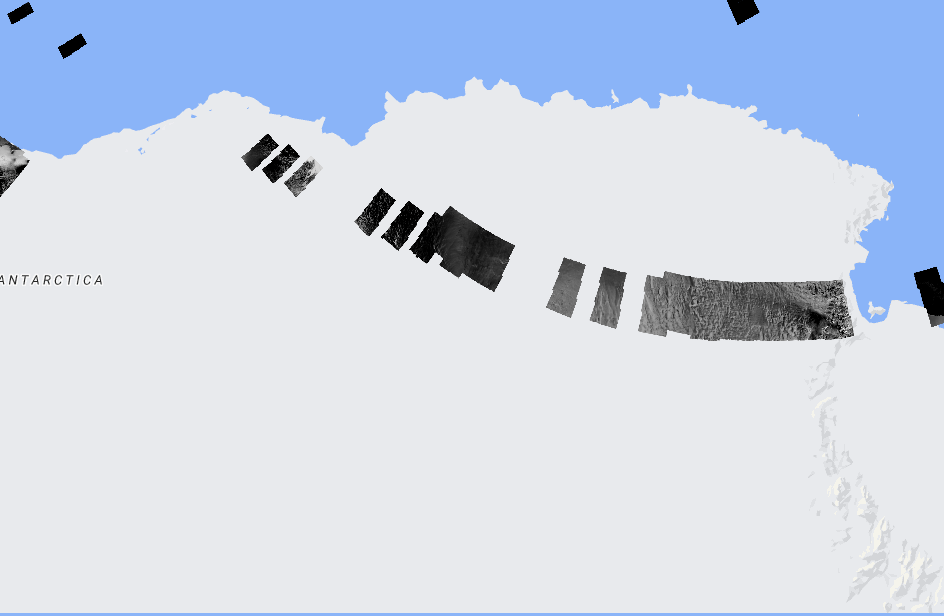

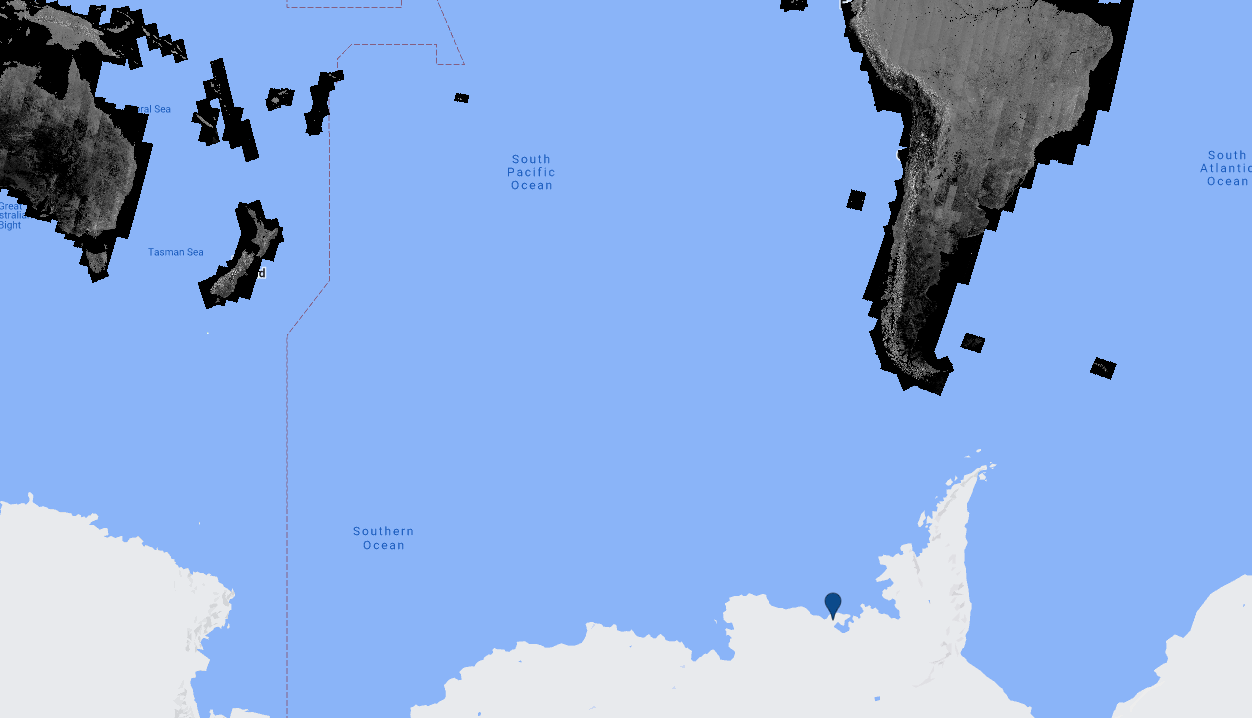

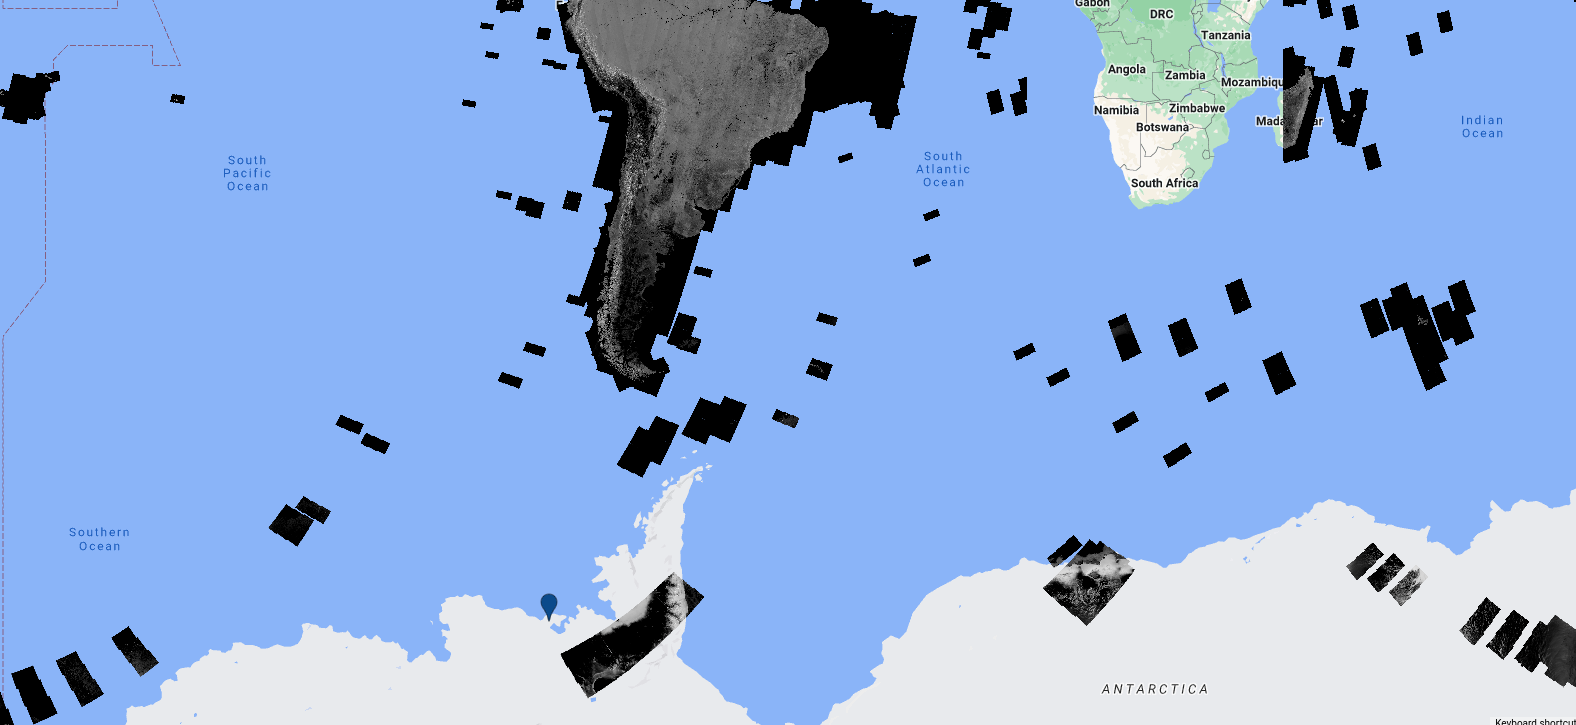

The map impressions where generate using google earth engine code editor.
```javascript
var geometry = /* color: #d63000 */ee.Geometry.Point([-84.01030615209014,-73.21823033315094]);



// Get the VH collection.
var collectionVH = ee.ImageCollection('COPERNICUS/S1_GRD')
    .filter(ee.Filter.eq('instrumentMode', 'IW')).filterDate('2019-01-01', '2020-01-01')
    .filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH'))
    .select(['VH']);
// Collection max.  Zoom to Shanghai for an interesting visualization.
Map.addLayer(collectionVH, {min: -25, max: 0}, 'max value 20', true);
```

#### MintPy


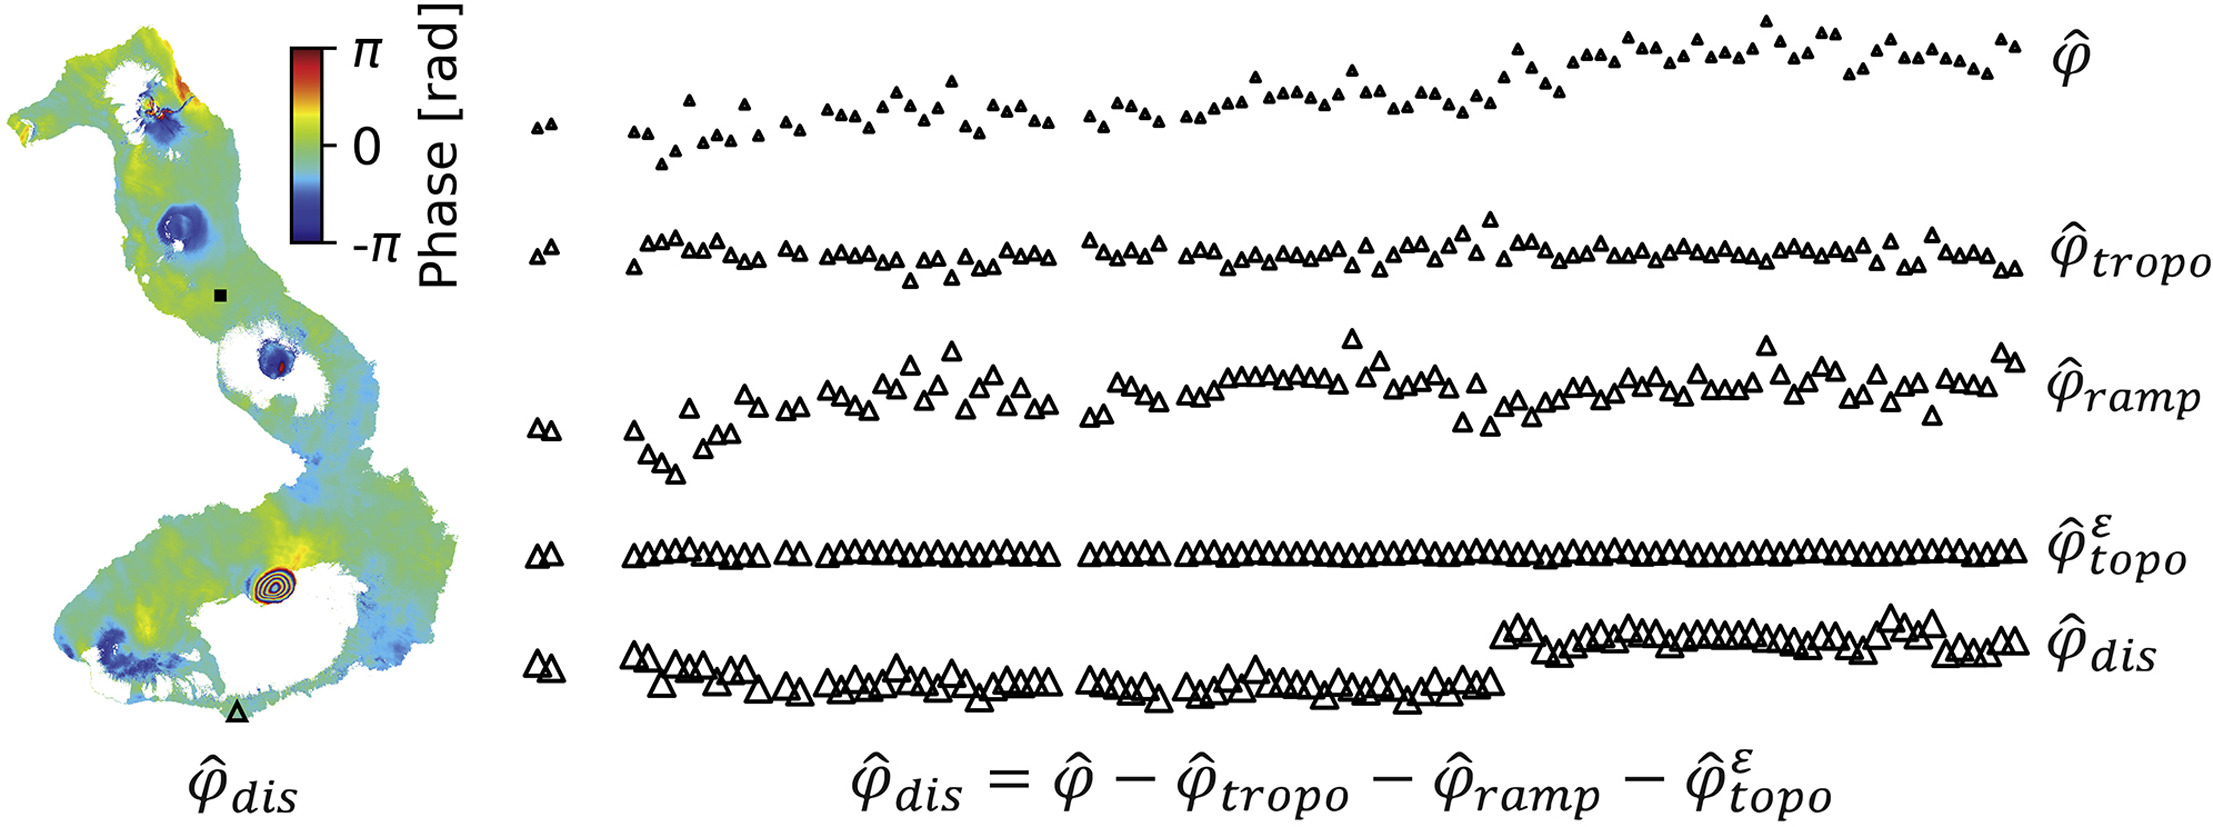
[Small baseline InSAR time series analysis: Unwrapping error correction and noise reduction](https://www.sciencedirect.com/science/article/abs/pii/S0098300419304194?via%3Dihub)

#### Hyp3 by ASF
[Example Notebooks](./dk_example.ipynb)

With a modified notebook [from](https://hyp3-docs.asf.alaska.edu/using/sdk/) a glacier flow was generated.

**Greenland**

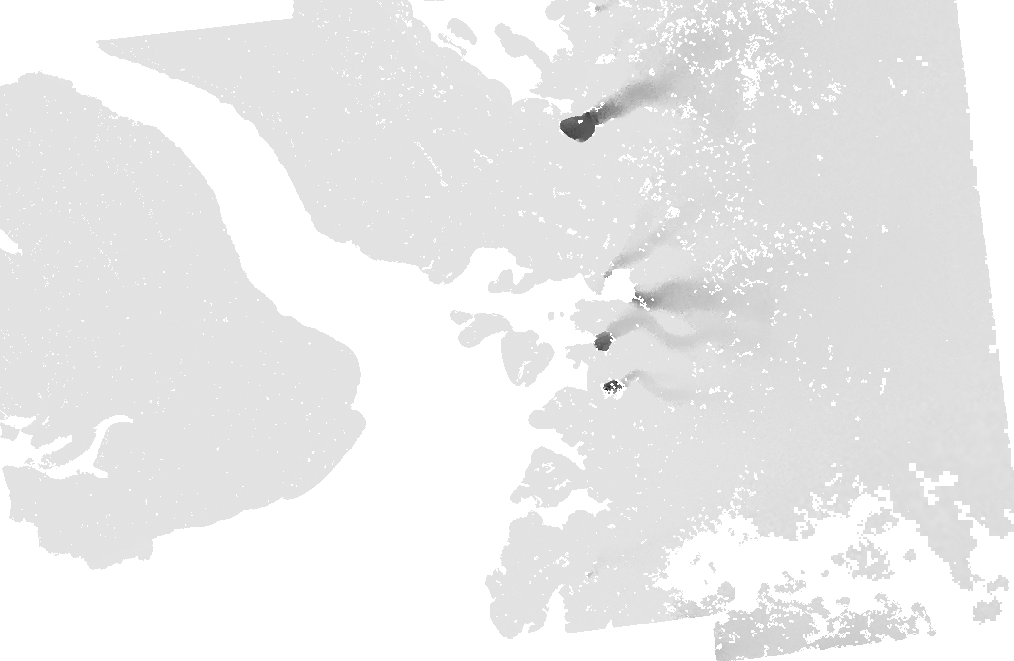

**Twhaites Glacier**
No appearant movement was detected.
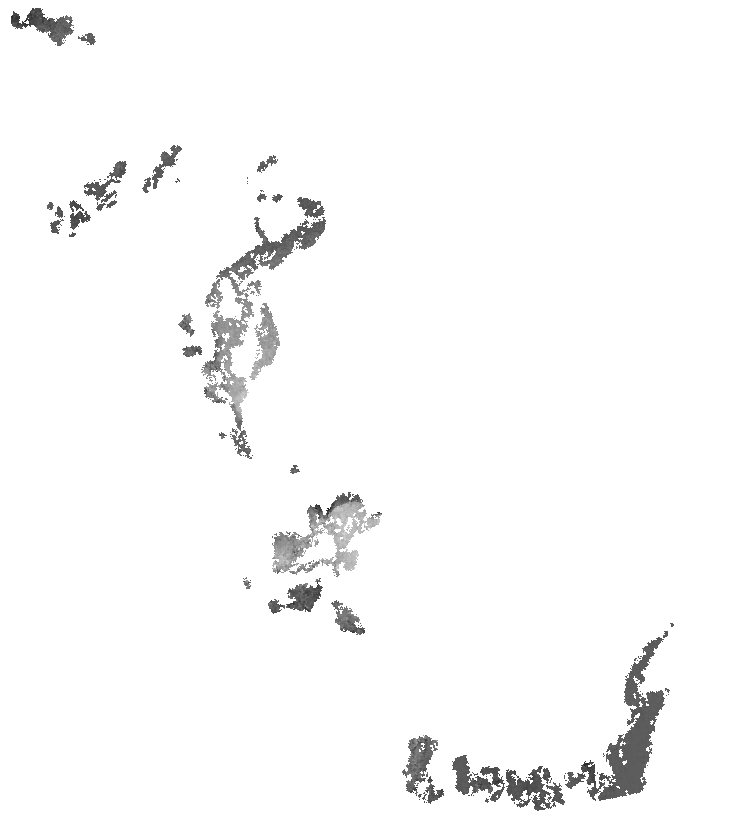

#### PyGMT Sar

InSAR Line of Sight plot of via [PyGMTSar package](https://colab.research.google.com/drive/1dDFG8BoF4WfB6tOF5sAi5mjdBKRbhxHo?usp=sharing#scrollTo=CfeFUBtOpGTw)
The [Notebook](ico_do_Fogo_Volcano_Eruption_2014.ipynb)
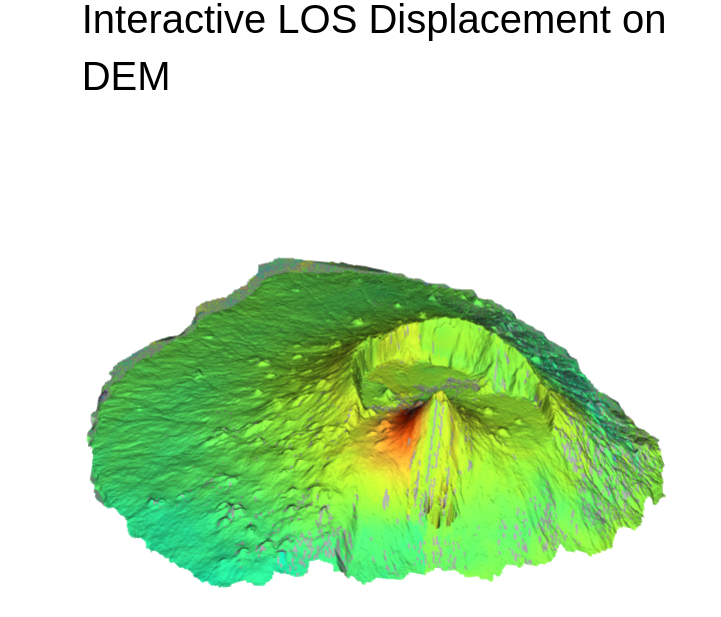

**3D Interferogram**

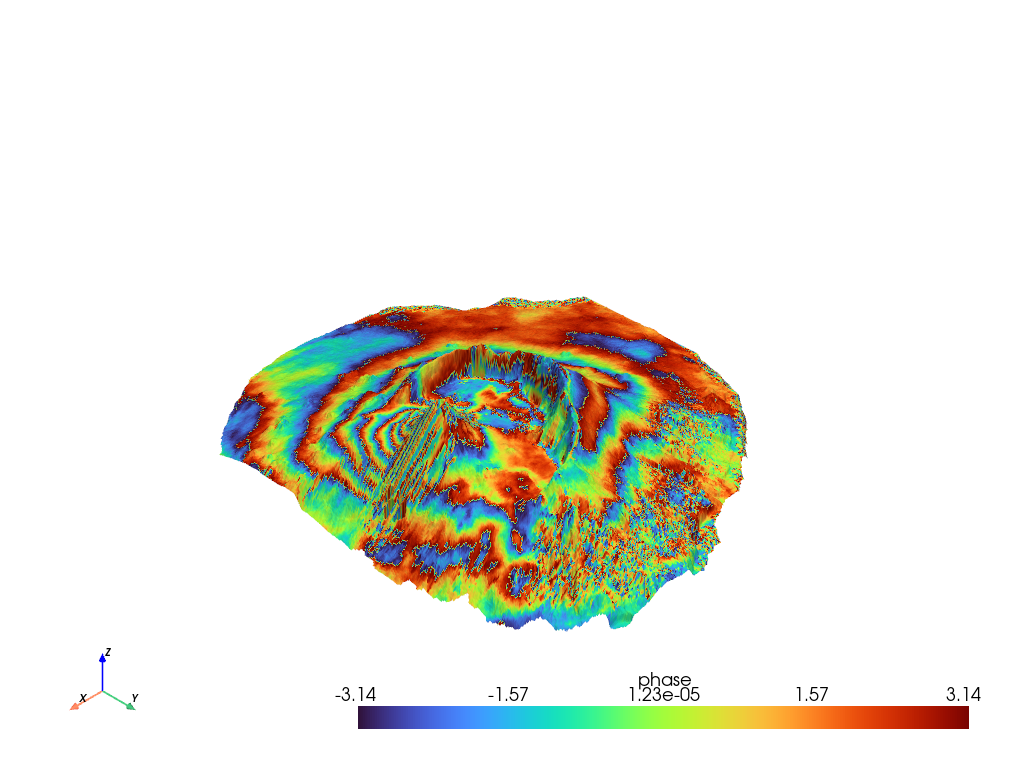

Here is the running example for the volcano: [Example](./Pico_do_Fogo_Volcano_Eruption_2014.ipynb)

## PyGMTSar Example using to measure the speed of Twaites Glacier
From Example PyGMTSar seemed most promising and it was used to process with the Footprint Above.

In [5]:
import platform, sys, os
# use default GMTSAR installation path
PATH = os.environ['PATH']
if PATH.find('GMTSAR') == -1:
    PATH = os.environ['PATH'] + ':/usr/local/GMTSAR/bin/'
    %env PATH {PATH}

import xarray as xr
import numpy as np
import pandas as pd
import geopandas as gpd
import json
from dask.distributed import Client
import dask

from pygmtsar import S1, Stack, tqdm_dask, NCubeVTK, ASF, XYZTiles

In [6]:
# plotting modules
import pyvista as pv
# magic trick for white background
pv.set_plot_theme("document")
import panel
panel.extension('vtk')
from contextlib import contextmanager
import matplotlib.pyplot as plt
@contextmanager
def mpl_settings(settings):
    original_settings = {k: plt.rcParams[k] for k in settings}
    plt.rcParams.update(settings)
    yield
    plt.rcParams.update(original_settings)
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.titlesize'] = 24
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
%matplotlib inline

In [7]:
# define Pandas display settings
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 100)

In [8]:
SELECTION = "TWAITES"


if SELECTION == "TWAITES":
    # POLYGON((-83.2583 -73.6397,-83.3385 -73.8567,-82.5129 -74.0471,-80.2502 -73.9392,-81.0891 -73.4494,-83.2583 -73.6397))
    # WKT

    SCENES = """
S1A_IW_SLC__1SSH_20210308T082926_20210308T082953_036904_045743_2075
S1A_IW_SLC__1SSH_20210320T082926_20210320T082953_037079_045D60_4C31
S1A_IW_SLC__1SSH_20210401T082926_20210401T082953_037254_046368_3193
S1A_IW_SLC__1SSH_20210413T082926_20210413T082953_037429_046976_769A
S1A_IW_SLC__1SSH_20210425T082927_20210425T082954_037604_046F80_3BE0
S1A_IW_SLC__1SSH_20210507T082928_20210507T082955_037779_04757A_ECFB
S1A_IW_SLC__1SSH_20210519T082928_20210519T082955_037954_047AC6_8163
S1A_IW_SLC__1SSH_20210531T082929_20210531T082956_038129_048006_1A86
"""

SCENES = list(filter(None, SCENES.split('\n')))
print (f'Scenes defined: {len(SCENES)}')

geojson = '''
{
  "type": "Feature",
  "geometry": {
    "type": "LineString",
    "coordinates": [      
                  [-82.9114, -74.1209],
        [-80.4734, -73.5324],
        [-83.5616, -72.5449],
        [-85.8913, -73.0969],
        [-86.2434, -73.3238],
        [-83.5345, -74.2611],
        [-82.9114, -74.1209]
  ]
  },
  "properties": {}
}
'''



SUBSWATH = 12
WORKDIR      = 'raw_ARSI_RSCD_TWAITES'
DATADIR      = 'data_ARSI_RSCD_TWAITES'

Scenes defined: 8


In [9]:
AOI = gpd.GeoDataFrame.from_features([json.loads(geojson)])

In [10]:
# subsidence point from https://blog.descarteslabs.com/sentinel-1-targeted-analysis
geojson = '''
{
  "type": "Feature",
  "geometry": {
    "type": "Point",
    "coordinates": [-81.66940672525044,-73.81689291697269]
  },
  "properties": {}
}
'''
POI = gpd.GeoDataFrame.from_features([json.loads(geojson)])
POI

,geometry
0,POINT (-81.66941 -73.81689)


In [11]:
# reference point from https://blog.descarteslabs.com/sentinel-1-targeted-analysis
geojson = '''
{
  "type": "Feature",
  "geometry": {
    "type": "Point",
    "coordinates": [-81.82733519204731,-73.84404576868988]
  },
  "properties": {}
}
'''
POI0 = gpd.GeoDataFrame.from_features([json.loads(geojson)])
POI0

,geometry
0,POINT (-81.82734 -73.84405)


#### Data Download
Data was downloaded from [https://search.asf.alaska.edu/](https://search.asf.alaska.edu/) manually using the search polygon: 
POLYGON((-82.9114 -74.1209,-80.4734 -73.5324,-83.5616 -72.5449,-85.8913 -73.0969,-86.2434 -73.3238,-83.5345 -74.2611,-82.9114 -74.1209)) and search filter: 

File Type: L1 Single Look Complex (SLC)
Subtype: SA ( Sentinel A )
Beam Mode: IW
Direction: Descending

17 scences where selected and added to the download queue.
 
- S1A_IW_SLC__1SSH_20210308T082926_20210308T082953_036904_045743_2075-SLC
- S1A_IW_SLC__1SSH_20210320T082926_20210320T082953_037079_045D60_4C31-SLC
- S1A_IW_SLC__1SSH_20210401T082926_20210401T082953_037254_046368_3193-SLC
- S1A_IW_SLC__1SSH_20210413T082926_20210413T082953_037429_046976_769A-SLC
- S1A_IW_SLC__1SSH_20210425T082927_20210425T082954_037604_046F80_3BE0-SLC
- S1A_IW_SLC__1SSH_20210507T082928_20210507T082955_037779_04757A_ECFB-SLC
- S1A_IW_SLC__1SSH_20210519T082928_20210519T082955_037954_047AC6_8163-SLC
- S1A_IW_SLC__1SSH_20210531T082929_20210531T082956_038129_048006_1A86-SLC
- S1A_IW_SLC__1SSH_20210612T082930_20210612T082957_038304_048536_D749-SLC
- S1A_IW_SLC__1SSH_20210624T082930_20210624T082957_038479_048A6D_16B3-SLC
- S1A_IW_SLC__1SSH_20210718T082932_20210718T082959_038829_0494F3_E530-SLC
- S1A_IW_SLC__1SSH_20210706T082931_20210706T082958_038654_048FB4_0455-SLC
- S1A_IW_SLC__1SSH_20210823T082934_20210823T083001_039354_04A5E6_1AE6-SLC
- S1A_IW_SLC__1SSH_20210904T082934_20210904T083001_039529_04ABE9_CC9D-SLC
- S1A_IW_SLC__1SSH_20210916T082935_20210916T083002_039704_04B1E2_AF2F-SLC
- S1A_IW_SLC__1SSH_20210730T082932_20210730T082959_039004_049A26_50E4-SLC
- S1A_IW_SLC__1SSH_20210928T082935_20210928T083002_039879_04B7E5_B88A-SLC



Using the "Download all python script" all of these files where downloaded. The file is named "data/download_twaites.py", which resulted in **61 GB**




The Following should Download even the S1A tiles, but it doesn't that is why the tiles where download manually before.

In [12]:
# Set these variables to None and you will be prompted to enter your username and password below.
username = 'GoogleColab2023'
password = 'GoogleColab_2023'


# download required polarization and subswaths only
asf = ASF(username, password)
asf.download(DATADIR, SCENES, SUBSWATH)


ASF Downloading Sentinel-1 SLC:   0%|          | 0/8 [00:00<?, ?it/s]

ASF Downloading Sentinel-1 Orbits:   0%|          | 0/8 [00:00<?, ?it/s]

,scene,orbit
0,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_SLC__1SSH_20210308T082926_20210308T082953_036904_0...,https://s1qc.asf.alaska.edu/aux_poeorb/S1A_OPER_AUX_POEORB_OPOD_20210328T121754_V20210307T225942...
1,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_SLC__1SSH_20210320T082926_20210320T082953_037079_0...,https://s1qc.asf.alaska.edu/aux_poeorb/S1A_OPER_AUX_POEORB_OPOD_20210409T121940_V20210319T225942...
2,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_SLC__1SSH_20210401T082926_20210401T082953_037254_0...,https://s1qc.asf.alaska.edu/aux_poeorb/S1A_OPER_AUX_POEORB_OPOD_20210421T121744_V20210331T225942...
3,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_SLC__1SSH_20210413T082926_20210413T082953_037429_0...,https://s1qc.asf.alaska.edu/aux_poeorb/S1A_OPER_AUX_POEORB_OPOD_20210503T121721_V20210412T225942...
4,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_SLC__1SSH_20210425T082927_20210425T082954_037604_0...,https://s1qc.asf.alaska.edu/aux_poeorb/S1A_OPER_AUX_POEORB_OPOD_20210515T121849_V20210424T225942...
5,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_SLC__1SSH_20210507T082928_20210507T082955_037779_0...,https://s1qc.asf.alaska.edu/aux_poeorb/S1A_OPER_AUX_POEORB_OPOD_20210527T121805_V20210506T225942...
6,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_SLC__1SSH_20210519T082928_20210519T082955_037954_0...,https://s1qc.asf.alaska.edu/aux_poeorb/S1A_OPER_AUX_POEORB_OPOD_20210608T121818_V20210518T225942...
7,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_SLC__1SSH_20210531T082929_20210531T082956_038129_0...,https://s1qc.asf.alaska.edu/aux_poeorb/S1A_OPER_AUX_POEORB_OPOD_20210620T121711_V20210530T225942...


In [17]:
!ls /home/jovyan/notebooks/data_ARSI_RSCD_TWAITES

asf_scripts.py
download_twaites.py
extract_twaites.py
__init__.py
__pycache__
S1A_OPER_AUX_POEORB_OPOD_20210328T121754_V20210307T225942_20210309T005942.EOF
S1A_OPER_AUX_POEORB_OPOD_20210409T121940_V20210319T225942_20210321T005942.EOF
S1A_OPER_AUX_POEORB_OPOD_20210421T121744_V20210331T225942_20210402T005942.EOF
S1A_OPER_AUX_POEORB_OPOD_20210503T121721_V20210412T225942_20210414T005942.EOF
S1A_OPER_AUX_POEORB_OPOD_20210515T121849_V20210424T225942_20210426T005942.EOF
S1A_OPER_AUX_POEORB_OPOD_20210527T121805_V20210506T225942_20210508T005942.EOF
S1A_OPER_AUX_POEORB_OPOD_20210608T121818_V20210518T225942_20210520T005942.EOF
S1A_OPER_AUX_POEORB_OPOD_20210620T121711_V20210530T225942_20210601T005942.EOF


Run the download script seperatly
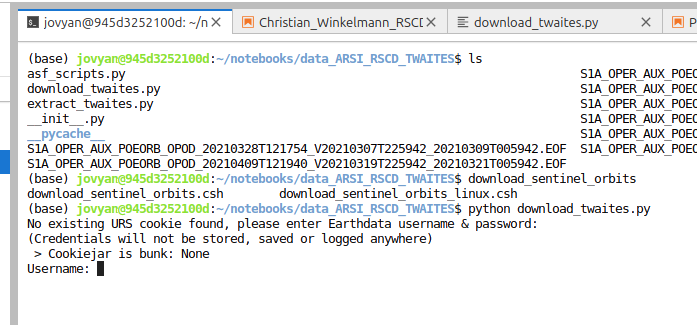
```bash
python /home/jovyan/notebooks/data_ARSI_RSCD_TWAITES/download_twaites.py
```


No existing URS cookie found, please enter Earthdata username & password:
(Credentials will not be stored, saved or logged anywhere)
 > Cookiejar is bunk: None
Username: 

In [16]:
## Extract the zip archives.
from data_ARSI_RSCD_TWAITES.extract_twaites import extract
extract(source_dir="/home/jovyan/notebooks/data_ARSI_RSCD_TWAITES", destination_dir="/home/jovyan/notebooks/data_ARSI_RSCD_TWAITES")

All files have been extracted.


In [ ]:
client = Client()
client

In [ ]:
scenes = S1.scan_slc(DATADIR, subswath=SUBSWATH)

In [ ]:
sbas = Stack(WORKDIR, drop_if_exists=True).set_scenes(scenes)
sbas.to_dataframe()

In [ ]:
sbas.plot_scenes(AOI=AOI, aspect='equal')

In [ ]:
sbas.compute_reframe(AOI)

In [ ]:
sbas.plot_scenes(AOI=AOI, aspect='equal')

In [ ]:
sbas.download_dem(AOI)

In [ ]:
sbas.plot_scenes(AOI=AOI)


In [ ]:
if os.path.exists('/.dockerenv') and not 'google.colab' in sys.modules:
    # use special joblib backend in Docker containers
    sbas.compute_align(joblib_aligning_backend='threading')
else:
    sbas.compute_align()

In [ ]:
sbas.compute_geocode(1)

The Topography of the Field of view looks pretty plain, which is expected of a flat glacier

In [ ]:
sbas.plot_topo(quantile=[0.01, 0.99])

In [ ]:
baseline_pairs = sbas.sbas_pairs(days=24)
# optionally, drop dates having less then 2 pairs
#baseline_pairs = sbas.sbas_pairs_limit(baseline_pairs, limit=2, iterations=2)
# optionally, drop all pairs connected to the specified dates
#baseline_pairs = sbas.sbas_pairs_filter_dates(baseline_pairs, ['2021-01-01'])
baseline_pairs

In [ ]:
with mpl_settings({'figure.dpi': 300}):
    sbas.plot_baseline(baseline_pairs)

## Persistent Scatterers Function (PSF)

In [ ]:
# use the only selected dates for the pixels stability analysis
sbas.compute_ps()

In [ ]:
sbas.plot_psfunction(quantile=[0.01, 0.90])

In [ ]:
sbas.compute_interferogram_multilook(baseline_pairs, 'intf_mlook', wavelength=30, weight=sbas.psfunction())

In [ ]:
# optionally, materialize to disk and open
ds_sbas = sbas.open_stack('intf_mlook')
intf_sbas = ds_sbas.phase
corr_sbas = ds_sbas.correlation
corr_sbas

In [ ]:
intf_sbas

In [ ]:
sbas.plot_interferograms(intf_sbas[:8], caption='SBAS Phase, [rad]')

In [ ]:
sbas.plot_correlations(corr_sbas[:8], caption='SBAS Correlation')

In [ ]:
unwrap_sbas = sbas.unwrap_snaphu(intf_sbas, corr_sbas)
unwrap_sbas

In [ ]:
# optionally, materialize to disk and open
unwrap_sbas = sbas.sync_cube(unwrap_sbas, 'unwrap_sbas')

In [ ]:
sbas.plot_phases(unwrap_sbas.phase[:8], caption='SBAS Phase, [rad]')

In [ ]:
decimator = sbas.decimator(resolution=15, grid=(1,1))
topo = decimator(sbas.get_topo())
inc = decimator(sbas.incidence_angle())
yy, xx = xr.broadcast(topo.y, topo.x)
trend_sbas = sbas.regression(unwrap_sbas.phase,
        [topo,    topo*yy,    topo*xx,    topo*yy*xx,
         topo**2, topo**2*yy, topo**2*xx, topo**2*yy*xx,
         topo**3, topo**3*yy, topo**3*xx, topo**3*yy*xx,
         inc,     inc**yy,    inc*xx,     inc*yy*xx,
         yy, xx,
         yy**2, xx**2, yy*xx,
         yy**3, xx**3, yy**2*xx, xx**2*yy], corr_sbas)

In [ ]:
# optionally, materialize to disk and open
trend_sbas = sbas.sync_cube(trend_sbas, 'trend_sbas')

In [ ]:
sbas.plot_phases(trend_sbas[:8], caption='SBAS Trend Phase, [rad]', quantile=[0.01, 0.99])

In [ ]:
sbas.plot_phases((unwrap_sbas.phase - trend_sbas)[:8], caption='SBAS Phase - Trend, [rad]', vmin=-np.pi, vmax=np.pi)

### Coherence-Weighted Least-Squares Solution for LOS Displacement, mm

In [ ]:
sbas.plot_displacements(disp_sbas[::3], caption='SBAS Cumulative LOS Displacement, [mm]', quantile=[0.01, 0.99])

## Result presentation
The Field of Radar Interferometry is complex and datasize require long downloads and computations. While publications suggest Glacier movement can be visualised and measured easily using SBAS and LOS Displacement it was not reproducable. With PyGMTsar did noch fully calculate on the given AOI, sometimes failing with DEM ownload
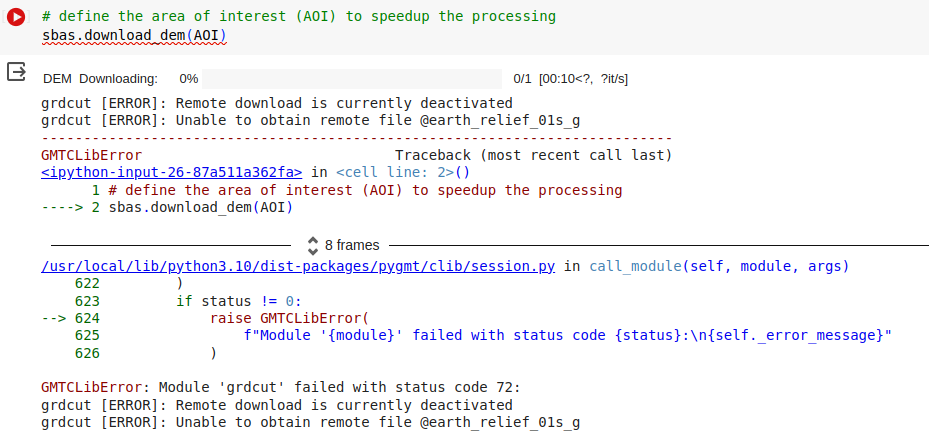

And because the SNAPHU Unwarpping never finished: 

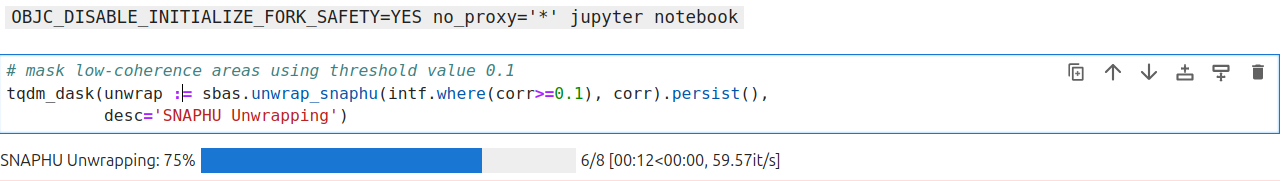

the Displacement was not possible to compute.

## Discussion and conclusion
discuss your results and make conclusions with regard to your chosen topic

PyGMTSar is easy to use and especially in google colab can provide fast insights into [earthquakes](https://colab.research.google.com/drive/1shNGvUlUiXeyV7IcTmDbWaEM6XrB0014?usp=sharing), [volcano eruptions](https://colab.research.google.com/drive/1dDFG8BoF4WfB6tOF5sAi5mjdBKRbhxHo?usp=sharing) and [floods](https://colab.research.google.com/drive/1aqAr9KWKzGx9XpVie1M000C3vUxzNDxu?usp=sharing). Modfiying the code is complex too as the documentation is not very well. Full Knowledge of the Base Package GMTSar would improve the insights.

Hyp3 with the inclusion of remote processing, especially AutoRift helps encapsulating long and complex calculations while not leaving data in a Silo.

Hyp3 and MintPy provide easy access to cloud processing and allow syncing to a local machine. But the usage is complex too as MintPy is not a native python library.

## References

Guns, K., Xu, X., Bock, Y., & Sandwell, D. (2022). GNSS-corrected InSAR displacement time-series spanning the 2019 Ridgecrest, CA earthquakes, Geophysical Journal International, Volume 230, Issue 2, September 2022, Pages 1358–1373, [](https://doi.org/10.1093/gji/ggac121)

Neely, W.R., Borsa, A.A., and Silverii, F. (2020). "GInSAR: A cGPS Correction for Enhanced InSAR Time Series," in IEEE Transactions on Geoscience and Remote Sensing, vol. 58, no. 1, pp. 136-146, https://doi.org/10.1109/TGRS.2019.2934118.

Xu, X., Sandwell, D. T., Klein, E., & Bock, Y. (2021). Integrated Sentinel-1 InSAR and GNSS time-series along the San Andreas fault system. Journal of Geophysical Research: Solid Earth, 126, e2021JB022579. https://doi.org/10.1029/2021JB022579

MintPy - Yunjun, Z., Fattahi, H., and Amelung, F. (2019), Small baseline InSAR time series analysis: Unwrapping error correction and noise reduction, Computers & Geosciences, 133, 104331.

Gardner, A.S., Moholdt, G., Scambos, T., Fahnstock, M., Ligtenberg, S., Broeke, M.V.D. and Nilsson, J., 2018. Increased West Antarctic and unchanged East Antarctic ice discharge over the last 7 years. The Cryosphere, 12(2), pp.521-547.

[AutoRift](https://doi.org/10.3390/rs13040749)
Lei, Y., Gardner, A. and Agram, P., 2021. Autonomous Repeat Image Feature Tracking (autoRIFT) and Its Application for Tracking Ice Displacement. Remote Sensing, 13(4), p.749.

[Optical Glacier Flow Measurement](https://tc.copernicus.org/articles/15/2115/2021/tc-15-2115-2021.pdf)

https://www.tandfonline.com/doi/full/10.1080/22797254.2018.1559001



**Further Reading**

**GMTSar**
- https://topex.ucsd.edu/gmtsar/
- https://github.com/gmtsar/gmtsar
- https://github.com/gmtsar/Earthscope-GMTSAR-Shortcourse

**Snow and Ice Classification**
https://docs.terradue.com/ellip/solutions/notebooks/examples/polar/resources/code/polarstern/03-snow-ice-classification.html

**Tutorial on Glacier Flow Analysis**
https://elisecolin.medium.com/glacier-flow-and-surface-analysis-using-remote-sensing-at-the-intersection-of-different-radar-c3011faded57

**Sentinelhub Tutorials**
https://www.sentinel-hub.com/explore/education/

**SAR Interferrometry**
https://step.esa.int/docs/tutorials/S1TBX%20TOPSAR%20Interferometry%20with%20Sentinel-1%20Tutorial_v2.pdf
https://eo4society.esa.int/projects/hi-five-high-resolution-forest-coverage-with-insar-deforestation-surveillance/

**MintPy**
https://github.com/insarlab/MintPy - see fernandina time series